In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

import test
from utils.data_utils import get_loader
# from models_swin.ms_swin_transformer import *
from models_swin.swin_transformer import *
import models_swin.ms_backup as ms_b

import matplotlib.pyplot as plt
# from visual import featuremap
import visual
import timm


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

args=test.parse_option()

In [ ]:
# data
_, test_loader = get_loader(args)
# train_list = list(enumerate(train_loader))
test_list = list(enumerate(test_loader))

# for i in range(0,3):
img, label = next(iter(test_loader))

plt.imshow(img[0,:].permute(1,2,0).detach().cpu().numpy())
# plt.imshow(test_loader.dataset.test_img[0])

In [4]:
# model
model_ckpt = torch.load('output/sample_run_swin_t_no_checkpoint.bin')
# model_ckpt = torch.load('output/ms_sample_run_swin_t_no_check_checkpoint.bin')
# model=MSSwinTransformer(img_size=448, num_classes=200, num_feature_layers=1, detail_features=True)
model=SwinTransformer(img_size=448, num_classes=200)
# model=ms_b.MSSwinTransformer(img_size=448, num_classes=200)
model.load_state_dict(model_ckpt['model'], strict=False)
model.eval()
# x=torch.randn((16,3,448,448))
x = test_list[0][1][0]
f, w = model.forward_features(x)
# logits=model(x)
# f.shape

In [ ]:
# multi-layer feature map
layers = [2, 2, 6, 2]
lf = model.layer_features
for i in range(len(layers)):
    for j in range(layers[i]):
        stage = i
        block = j
        edge=6
        corr,f = visual.featuremap(lf[stage][block], num_batch=0, edge=edge, start_ch=0)

        plt.figure()
        plt.suptitle('stage={0},block={1}'.format(stage, block), fontsize=14)
        plt.subplot(1, 2, 1)
        plt.imshow(corr)    
        plt.title("channel correlation")
        plt.subplot(1, 2, 2)
        plt.imshow(f)
        plt.title("feature map")
        # plt.colorbar()
#         plt.savefig('./visual/stage={0}_block={1}_edge{2}.png'.format(stage,block,edge),dpi=300)
        plt.show()                                    

In [ ]:
s=3
b=-1
plt.imshow(lf[s][b].mean(2).view(-1,int(112/2**s),int(112/2**s)).detach()[5,:,:])
lf[3][1].shape
plt.colorbar()

In [ ]:
## logits
# s=torch.nn.Sigmoid()(logits)
# sd=s.detach()
# plt.plot(sd[1,:])
plt.plot(logits[2,:].detach())
print(torch.argmax(logits[2,:]))

In [122]:
tl=iter(test_loader)

In [6]:
test_model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=True)

In [16]:
# CAM

from pytorch_grad_cam import GradCAM, \
                             ScoreCAM, \
                             GradCAMPlusPlus, \
                             AblationCAM, \
                             XGradCAM, \
                             EigenCAM, \
                             EigenGradCAM

from pytorch_grad_cam import GuidedBackpropReLUModel
from pytorch_grad_cam.utils.image import show_cam_on_image, \
                                         deprocess_image, \
                                         preprocess_image



In [ ]:
plt.imshow(img[0,:].permute(1,2,0).detach().cpu().numpy())

torch.Size([2048, 3, 49, 49])

In [16]:
os.path.join('models_swin/', 'ms_backup.py')

'models_swin/ms_backup.py'

In [5]:
# confusion matrix
test_loader.dataset[32][1]
labels=[test_loader.dataset[i][1] for i in range(len(test_loader.dataset))]

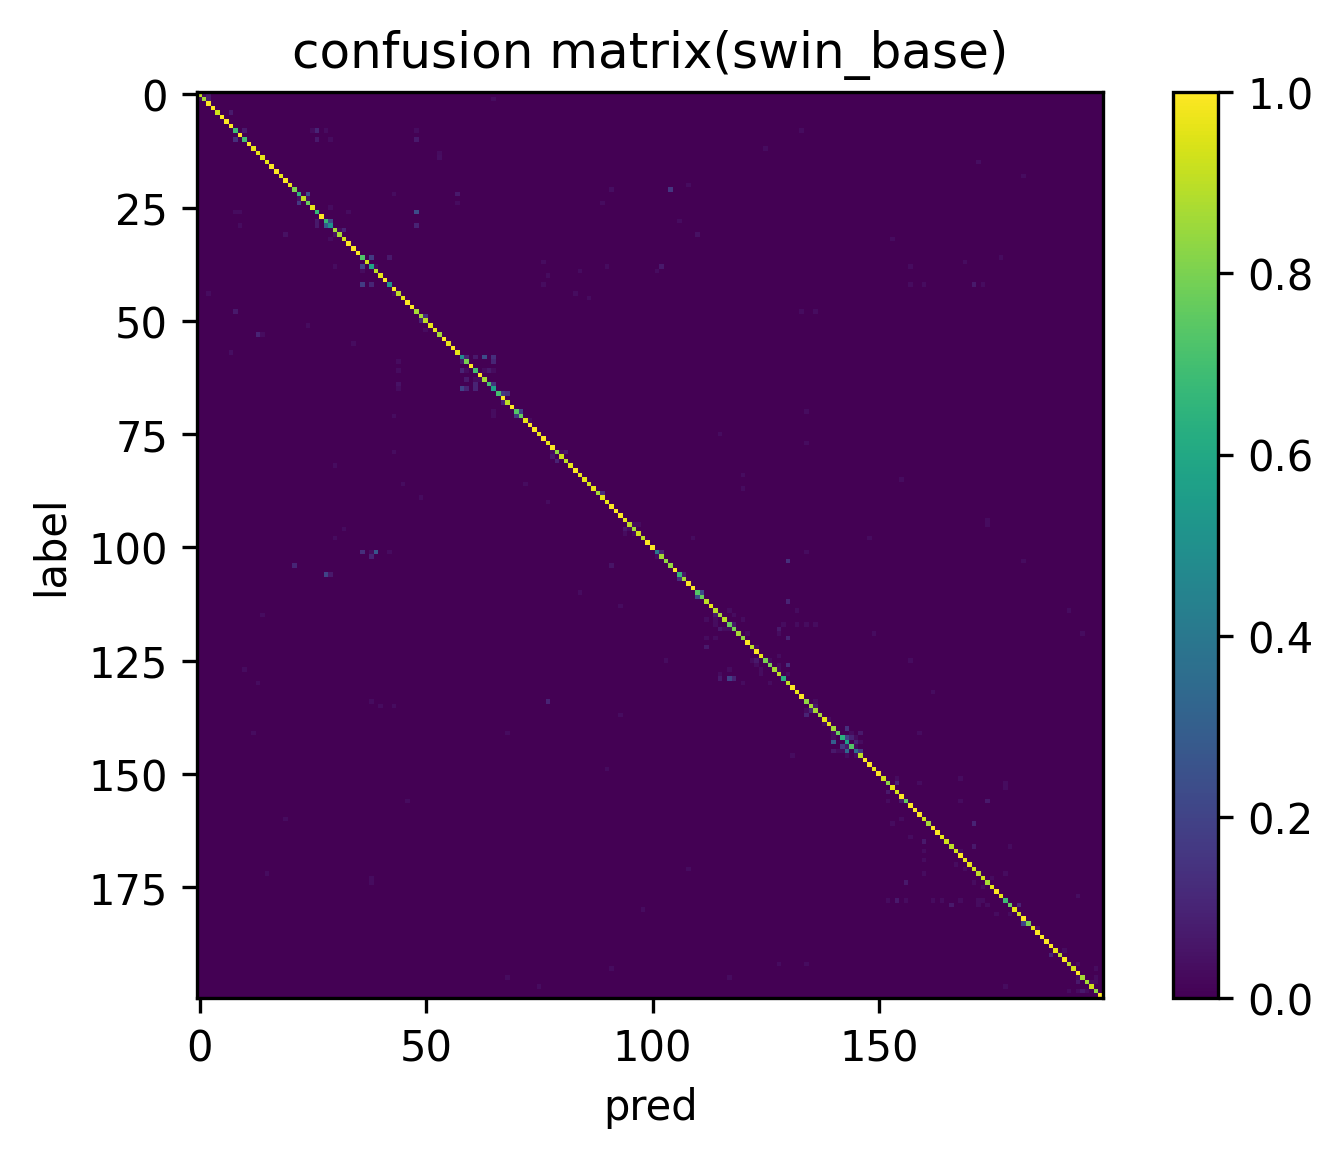

In [6]:
# confusion matrix
pred = np.load('confusion_base.npy')
conf = np.zeros((200,200))
err = []
for n, i in enumerate(labels):
    j = np.argmax(pred[n])
    if j != i:
        err.append([n,i,j])
    conf[i][j]+=1
    
plt.figure(dpi=300)
plt.imshow((conf.T/conf.sum(1)).T)
plt.colorbar()
plt.title('confusion matrix(swin_base)')
plt.xlabel('pred')
plt.ylabel('label')
plt.savefig('confusion_matrix_base.png',dpi=300)
plt.show()

In [180]:
conf.trace()/conf.sum()

0.897134967207456

In [ ]:
s=3
H = int(112/2**s)
plt.figure()
for b in range(2):
    plt.subplot(2,1,b+1)
    feature=lf[s][b]
    feature=feature.mean(2).squeeze()
    vv=feature.view(8,H,H)
    plt.imshow(vv[7])
    plt.colorbar()

In [ ]:
feature=lf[2][1]
feature=feature.mean(2).squeeze()
vv=feature.view(8,28,28)
plt.imshow(vv[7])
plt.colorbar()

In [7]:
path = './cam/'
path_err = './cam_err'

class_list = [i for i in os.listdir(path) if not 'ipynb_checkpoints' in i]
class_list.sort()
img_list=[]
for i in range(len(class_list)):
    tmp = [i for i in os.listdir(os.path.join(path,class_list[i])) if not 'ipynb_checkpoints' in i]
    tmp.sort()
    tmp_path = [os.path.join(class_list[i],j) for j in tmp]
    img_list = img_list+tmp_path

if not os.path.exists(path_err):
    os.makedirs(path_err)
    
img_err = []
for i in err:
    num = i[0]
    img_err_path = img_list[num]
    img_err.append(img_err_path)
    if not os.path.exists(os.path.join(path_err, os.path.split(img_err_path)[0])):
        os.makedirs(os.path.join(path_err, os.path.split(img_err_path)[0]))
    os.system('cp ' + os.path.join(path, img_list[num]) + ' ' +os.path.join(path_err, img_list[num]))
    

In [21]:
path = './cam/'
path_err = './cam_err'


tensor(1.0755, grad_fn=<SumBackward0>)

In [30]:
wf=w.flatten()

AttributeError: 'list' object has no attribute 'flatten'

In [32]:
[]+[1,2]+[4,1]

[1, 2, 4, 1]